In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=os.path.join('D:/Anaconda/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/msj.ttf'))

In [3]:
import matplotlib    
print(matplotlib.matplotlib_fname())

D:\Anaconda\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [4]:
data=pd.read_csv('2019opendog10-12.csv')

In [5]:
data.head()

,個股代號,公司簡稱,事件日,TCRI(年/月),事件強度,大事件類別,小事件類別,事件內容
0,1104,環泥,20191001,5(2019/06),0,M_經營層,MT02_董監異動,改派1董。董事周士貴(宇聲投資代表)卸任。董事楊宗仁(宇聲投資代表)新任。
1,1216,統一,20191001,3(2019/06),0,M_經營層,MT06_高管異動,研發主管陳英昌內部調動，由林宗翰接任。。
2,1342,八貫,20191001,6(2019/06),0,M_經營層,MO01_董監/大股東持股申讓,經理人本人李宏毅於2019/10/01預計申讓1張股票給財團法人證券投資人及期貨交易人保護中...
3,1460,宏遠,20191001,5(2019/06),-1,M_經營層,MT06_高管異動,財務經理俞瀛琁離職，由洪梃華接任。。
4,1595,川寶,20191001,6(2019/06),0,I_產業前景,IF01_增資/減資/融資發債,"川寶科技股份有限公司申報發行員工認股權憑證2,300單位，每單位得認購股數為1,000股，計..."


In [6]:
data.columns

Index(['個股代號', '公司簡稱', '事件日', 'TCRI(年/月)', '事件強度', '大事件類別', '小事件類別', '事件內容'], dtype='object')

In [7]:
data.dtypes

個股代號          int64
公司簡稱         object
事件日           int64
TCRI(年/月)    object
事件強度          int64
大事件類別        object
小事件類別        object
事件內容         object
dtype: object

刪除不需要的資料

In [8]:
data.isnull().sum()

個股代號           0
公司簡稱         162
事件日            0
TCRI(年/月)      0
事件強度           0
大事件類別          0
小事件類別          0
事件內容           0
dtype: int64

In [9]:
nullcompany=data[data.iloc[:,1].isnull()==True].iloc[:,0].unique()
nullcompany.sort()
nullcompany

array([1262, 1814, 3452, 3562, 4135, 4193, 4415, 5256, 5259, 6553, 6562,
       8127, 8479, 8913, 9157], dtype=int64)

股票1262: 綠悅 於2019年10月下市
股票1814: 東光訊 於2019年10月下市
股票3452: 益通光能 於2020年1月下市
股票3562: 頂晶科 於2020年2月下市
股票4135: 天賜爾 於2019年10月下市
股票4193: 喬本生醫 於2019年10月下市
股票4415: 台原藥 於2019年12月下市
股票5256: 銳捷 於2020年1月下市
股票5259: 益智博國際  於2019年11下市
股票6553: 豐華 於2019年12月下市
股票6562: 聯亞藥 於2019年11月下市
股票8127: 利汎 於2019年10月下市
股票8479: 台灣藝術 於2019年10月下市
股票8913: 全銓租賃 於2020年1月下市
股票9157: 陽光能源 於2019年11月下市

In [10]:
df=data.dropna(inplace=False)
df.isna().sum()

個股代號         0
公司簡稱         0
事件日          0
TCRI(年/月)    0
事件強度         0
大事件類別        0
小事件類別        0
事件內容         0
dtype: int64

In [11]:
len(df)

6780

In [12]:
df.iloc[6779,]

個股代號                                                      8482
公司簡稱                                            商億-KY         
事件日                                                   20191231
TCRI(年/月)                                 5(2019/09)          
事件強度                                                         0
大事件類別                                                   I_產業前景
小事件類別                                          IF02_投資/併購/組織策略
事件內容         商億-KY公告董事會為配合柬埔寨孫公司發展需求，擬透過子公司Shayne Internati...
Name: 6941, dtype: object

In [13]:
TCRI=[]
for i in range(0,len(df)):
    TCRI.append(df.iloc[i,3][0])

In [14]:
# month=[]
# for i in range(0,len(df)):
#     month.append(df.iloc[i,3][7:9])

In [15]:
df=df.drop(columns=['TCRI(年/月)'])
df.head()

,個股代號,公司簡稱,事件日,事件強度,大事件類別,小事件類別,事件內容
0,1104,環泥,20191001,0,M_經營層,MT02_董監異動,改派1董。董事周士貴(宇聲投資代表)卸任。董事楊宗仁(宇聲投資代表)新任。
1,1216,統一,20191001,0,M_經營層,MT06_高管異動,研發主管陳英昌內部調動，由林宗翰接任。。
2,1342,八貫,20191001,0,M_經營層,MO01_董監/大股東持股申讓,經理人本人李宏毅於2019/10/01預計申讓1張股票給財團法人證券投資人及期貨交易人保護中...
3,1460,宏遠,20191001,-1,M_經營層,MT06_高管異動,財務經理俞瀛琁離職，由洪梃華接任。。
4,1595,川寶,20191001,0,I_產業前景,IF01_增資/減資/融資發債,"川寶科技股份有限公司申報發行員工認股權憑證2,300單位，每單位得認購股數為1,000股，計..."


In [16]:
df.insert(3, 'TCRI', TCRI)
df

,個股代號,公司簡稱,事件日,TCRI,事件強度,大事件類別,小事件類別,事件內容
0,1104,環泥,20191001,5,0,M_經營層,MT02_董監異動,改派1董。董事周士貴(宇聲投資代表)卸任。董事楊宗仁(宇聲投資代表)新任。
1,1216,統一,20191001,3,0,M_經營層,MT06_高管異動,研發主管陳英昌內部調動，由林宗翰接任。。
2,1342,八貫,20191001,6,0,M_經營層,MO01_董監/大股東持股申讓,經理人本人李宏毅於2019/10/01預計申讓1張股票給財團法人證券投資人及期貨交易人保護中...
3,1460,宏遠,20191001,5,-1,M_經營層,MT06_高管異動,財務經理俞瀛琁離職，由洪梃華接任。。
4,1595,川寶,20191001,6,0,I_產業前景,IF01_增資/減資/融資發債,"川寶科技股份有限公司申報發行員工認股權憑證2,300單位，每單位得認購股數為1,000股，計..."
5,1909,榮成,20191001,6,-1,M_經營層,MT06_高管異動,內部稽核主管蔡宗佑離職，由黃世瑜接任。。
6,2015,豐興,20191001,3,-1,I_產業前景,IS01_營收變動或客戶/商品/通路策略,豐興30日召開廠盤會議，決定調降廢鋼收購價格和鋼筋價格，其中廢鋼收購價格每公噸降300元、降...
7,2027,大成鋼,20191001,6,-1,M_經營層,MO06_董監持股質押,"董事長本人大英成投資2019/10/01設質1,000,000股給合作金庫票券金融，累計設質..."
8,2035,唐榮,20191001,8,1,I_產業前景,IS01_營收變動或客戶/商品/通路策略,唐榮30日開出10月內外銷盤價，300系熱軋與冷軋不銹鋼捲內銷價格每公噸都上調1500元，惟...
9,2061,風青,20191001,8,-1,M_經營層,MO06_董監持股質押,"董事長配偶吳雪琴2019/10/01設質2,000,000股給板信商業銀行，累計設質5,71..."


各欄位的EDA

個股代號=公司簡稱，所以只做公司簡稱統計圖

In [24]:
# numbercompany=[]
# for i in range(0,len(df.iloc[:,0])):
#     numbercompany.appends(str(df.iloc[i,0])[:2])

In [20]:
# a=pd.DataFrame(numbercompany)
# a.iloc[:,0].unique()

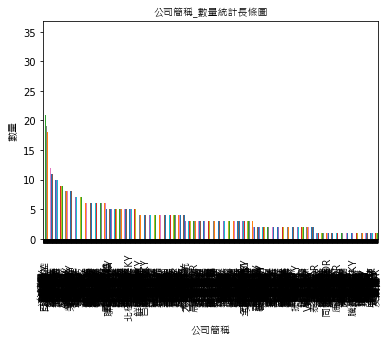

In [19]:
plt.xticks(fontproperties=myfont)
plt.title("公司簡稱_數量統計長條圖",fontproperties=myfont)
plt.xlabel("公司簡稱",fontproperties=myfont)
plt.ylabel("數量",fontproperties=myfont)
df.iloc[:,1].value_counts().plot.bar()

事件強度

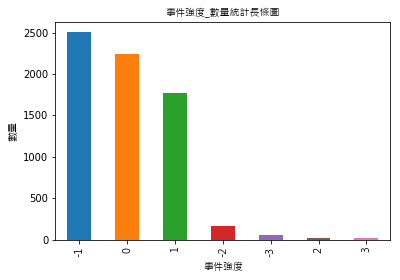

In [21]:
plt.xticks(fontproperties=myfont)
plt.title("事件強度_數量統計長條圖",fontproperties=myfont)
plt.xlabel("事件強度",fontproperties=myfont)
plt.ylabel("數量",fontproperties=myfont)
df.iloc[:,4].value_counts().plot.bar()

大事件類別

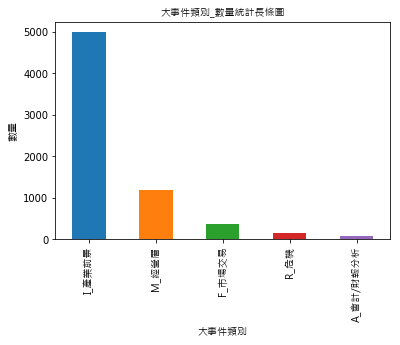

In [25]:
plt.xticks(fontproperties=myfont)
plt.title("大事件類別_數量統計長條圖",fontproperties=myfont)
plt.xlabel("大事件類別",fontproperties=myfont)
plt.ylabel("數量",fontproperties=myfont)
df.iloc[:,5].value_counts().plot.bar()

In [26]:
data.iloc[:,1].values

array(['環泥            ', '統一            ', '八貫            ', ...,
       '昇陽半導體      ', '雷虎            ', '商億-KY         '], dtype=object)

In [27]:
smallcount=[]
for i in range(1,len(df.iloc[:,6].value_counts())):
    smallcount.append(df.iloc[:,6].value_counts()[i])

In [46]:
df.iloc[:,5].unique()

array(['M_經營層', 'I_產業前景', 'F_市場交易', 'R_危機', 'A_會計/財報分析'], dtype=object)

以下還在做

<BarContainer object of 6780 artists>

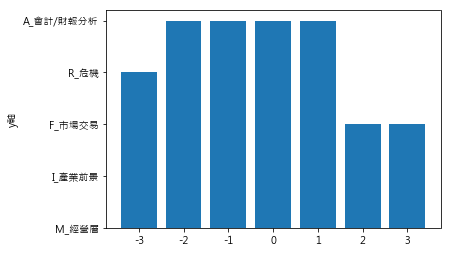

In [151]:
from matplotlib.font_manager import FontProperties
x=df.iloc[:,4].values
y=df.iloc[:,5].values
plt.xticks(fontproperties=myfont)
plt.yticks(range(100),fontproperties=myfont)
plt.ylabel("y軸",fontproperties=myfont)

plt.bar(x,y)

In [34]:
df.iloc[:,4].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
a=df.公司簡稱
b=df[df.TCRI.values=="7"].公司簡稱.unique()
c=df[df.TCRI.values=="8"].公司簡稱.unique()
d=df[df.TCRI.values=="9"].公司簡稱.unique()
e=[]
for i in range(0,len(b)):
    for k in range(0,len(c)): 
        if(b[i]==c[k])==True:
            e.append(b[i])
            print(b[i])

金麗科          
聯合再生        
亞獅康-KY       
福華            
錸德            
益得            
隴華            
台蠟            
台通            


In [17]:
f=[]
for z in range(0,len(e)):
    f.append(df[df.公司簡稱==e[z]].TCRI.values)
df2=pd.DataFrame(f,e)

In [18]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
金麗科,7,7,7,8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
聯合再生,7,7,7,7,7,7,7,7,7,7,8,None,None,None,None,None,None,None,None,None
亞獅康-KY,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8
福華,7,7,7,8,8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
錸德,7,7,8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
益得,7,7,7,7,7,8,8,8,None,None,None,None,None,None,None,None,None,None,None,None
隴華,7,7,7,8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
台蠟,8,8,8,8,8,7,7,None,None,None,None,None,None,None,None,None,None,None,None,None
台通,7,8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [21]:
for a in range(1,5):
    a=a+1
    print(a)

2
3
4
5


<BarContainer object of 6942 artists>

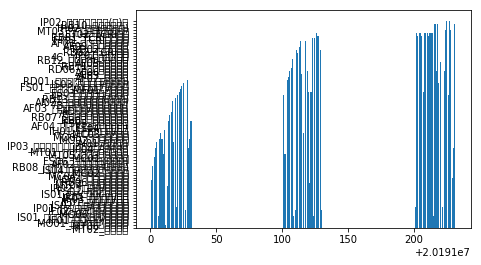

In [22]:
x=data.iloc[:,2].values
y=data.iloc[:,6].values
plt.bar(x,y)